# 1a. Data Cleaning: General Data Cleaning and EDA

## Introduction

This notebook only performs very superficial **data cleaning** and **exploratory data analysis** on our original data set. It only looks into the quality and relevance of the data for our purposes, leaving more complicated forms of data cleaning and data pre-processing for  later notebooks in the "1" series.

More precisely, the clean data set that this notebook produces will server as input for **Notebook 1b**, whose output will in turn be fed to **Notebook 1c**. This sequence will complete the data cleaning portion of our project.

The **workflow** for this notebook is thus set as follows:

- Input: **one .csv file** with our original data set from the Retractions Watch Database.
- Output: **one .csv file** with the exact same information, minus the elements that we cleaned away.

## Input / Output Parameters

Input parameters:

In [35]:

# File path for input .csv file

input_path = "../data/data_sets/1_original_data_set.csv"


Output parameters:

In [36]:

# File path for output .csv file

output_path = "../data/data_sets/2_clean_data_set.csv"


## Importing Libraries


Let us start by importing the libraries that we will need for this notebook:

In [37]:

# Import required libraries

import numpy as np
import pandas as pd
import missingno as msno


And let us also read the data from our .csv file:

In [38]:

# Read data from .csv file 

df = pd.read_csv(input_path, encoding='latin-1')


## Preliminary Look at the Data

Having done all that, we can now we ahead and take a first quick look at the data:

In [39]:

# Display header 

df.head(1)


,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,52765,An integrated 3D model based face recognition ...,(B/T) Data Science;(B/T) Technology;,"Management Information System Department, Cypr...",Applied Nanoscience,Springer,Turkey,Ali Milad;Kamil Yurtkan,https://retractionwatch.com/2024/01/26/springe...,Research Article;,6/30/2023 0:00,10.1007/s13204-024-03010-9,0.0,2/3/2022 0:00,10.1007/s13204-021-02123-9,0.0,Correction,+Error in Text;+Updated to Retraction;,No,See also: https://pubpeer.com/publications/BCC...



As we can see, there is quite a bit of information in our data set. Let's get a clearer sense of just how large our data frame is:

In [40]:
df.shape

(52290, 20)

That is quite a few columns to keep track of, so let's also get a preliminary sense of what each one of them contains:

In [41]:

# Display info on data type and non-null entries per column

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52290 entries, 0 to 52289
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Record ID              52290 non-null  int64  
 1   Title                  52290 non-null  object 
 2   Subject                52290 non-null  object 
 3   Institution            52289 non-null  object 
 4   Journal                52290 non-null  object 
 5   Publisher              52290 non-null  object 
 6   Country                52290 non-null  object 
 7   Author                 52290 non-null  object 
 8   URLS                   28504 non-null  object 
 9   ArticleType            52290 non-null  object 
 10  RetractionDate         52290 non-null  object 
 11  RetractionDOI          51788 non-null  object 
 12  RetractionPubMedID     47117 non-null  float64
 13  OriginalPaperDate      52290 non-null  object 
 14  OriginalPaperDOI       49751 non-null  object 
 15  Or

One thing that one can immediately see, is that the names of the columns are not on snake case. It will be much easier to manipulate our data frame with appropriately formatted column names, so let's do just that:

In [42]:

# Change column names to snake case

df.columns = [col.lower().replace(" ", "_") for col in df.columns]

# Check that it worked

df.columns


Index(['record_id', 'title', 'subject', 'institution', 'journal', 'publisher',
       'country', 'author', 'urls', 'articletype', 'retractiondate',
       'retractiondoi', 'retractionpubmedid', 'originalpaperdate',
       'originalpaperdoi', 'originalpaperpubmedid', 'retractionnature',
       'reason', 'paywalled', 'notes'],
      dtype='object')


Some of the names of columns still do not include spaces in the required places, so let us change that as well (unfortunately, by hand):

In [43]:

# Change names of remaining columns to snake_case

df = df.rename(columns={'articletype': 'article_type'})

df = df.rename(columns={'retractiondate': 'retraction_date'})

df = df.rename(columns={'retractiondoi': 'retraction_doi'})

df = df.rename(columns={'retractionpubmedid': 'retraction_pubmed_id'})

df = df.rename(columns={'originalpaperdate': 'original_paper_date'})

df = df.rename(columns={'originalpaperdoi': 'original_paper_doi'})

df = df.rename(columns={'originalpaperpubmedid': 'original_paper_pubmed_id'})

df = df.rename(columns={'retractionnature': 'retraction_nature'})


Let's make sure that that worked, and that all the names of our columns are now on snake case:

In [44]:

# Visualize column names again

df.columns


Index(['record_id', 'title', 'subject', 'institution', 'journal', 'publisher',
       'country', 'author', 'urls', 'article_type', 'retraction_date',
       'retraction_doi', 'retraction_pubmed_id', 'original_paper_date',
       'original_paper_doi', 'original_paper_pubmed_id', 'retraction_nature',
       'reason', 'paywalled', 'notes'],
      dtype='object')

We can see that the columns are now all on snake case, as we wanted. Earlier, we saw that some columns contained null entries, which could easily create problems in the future. Let us run a quick NaN analysis to get clearer picture of where exactly those null entries are located:

<Axes: >

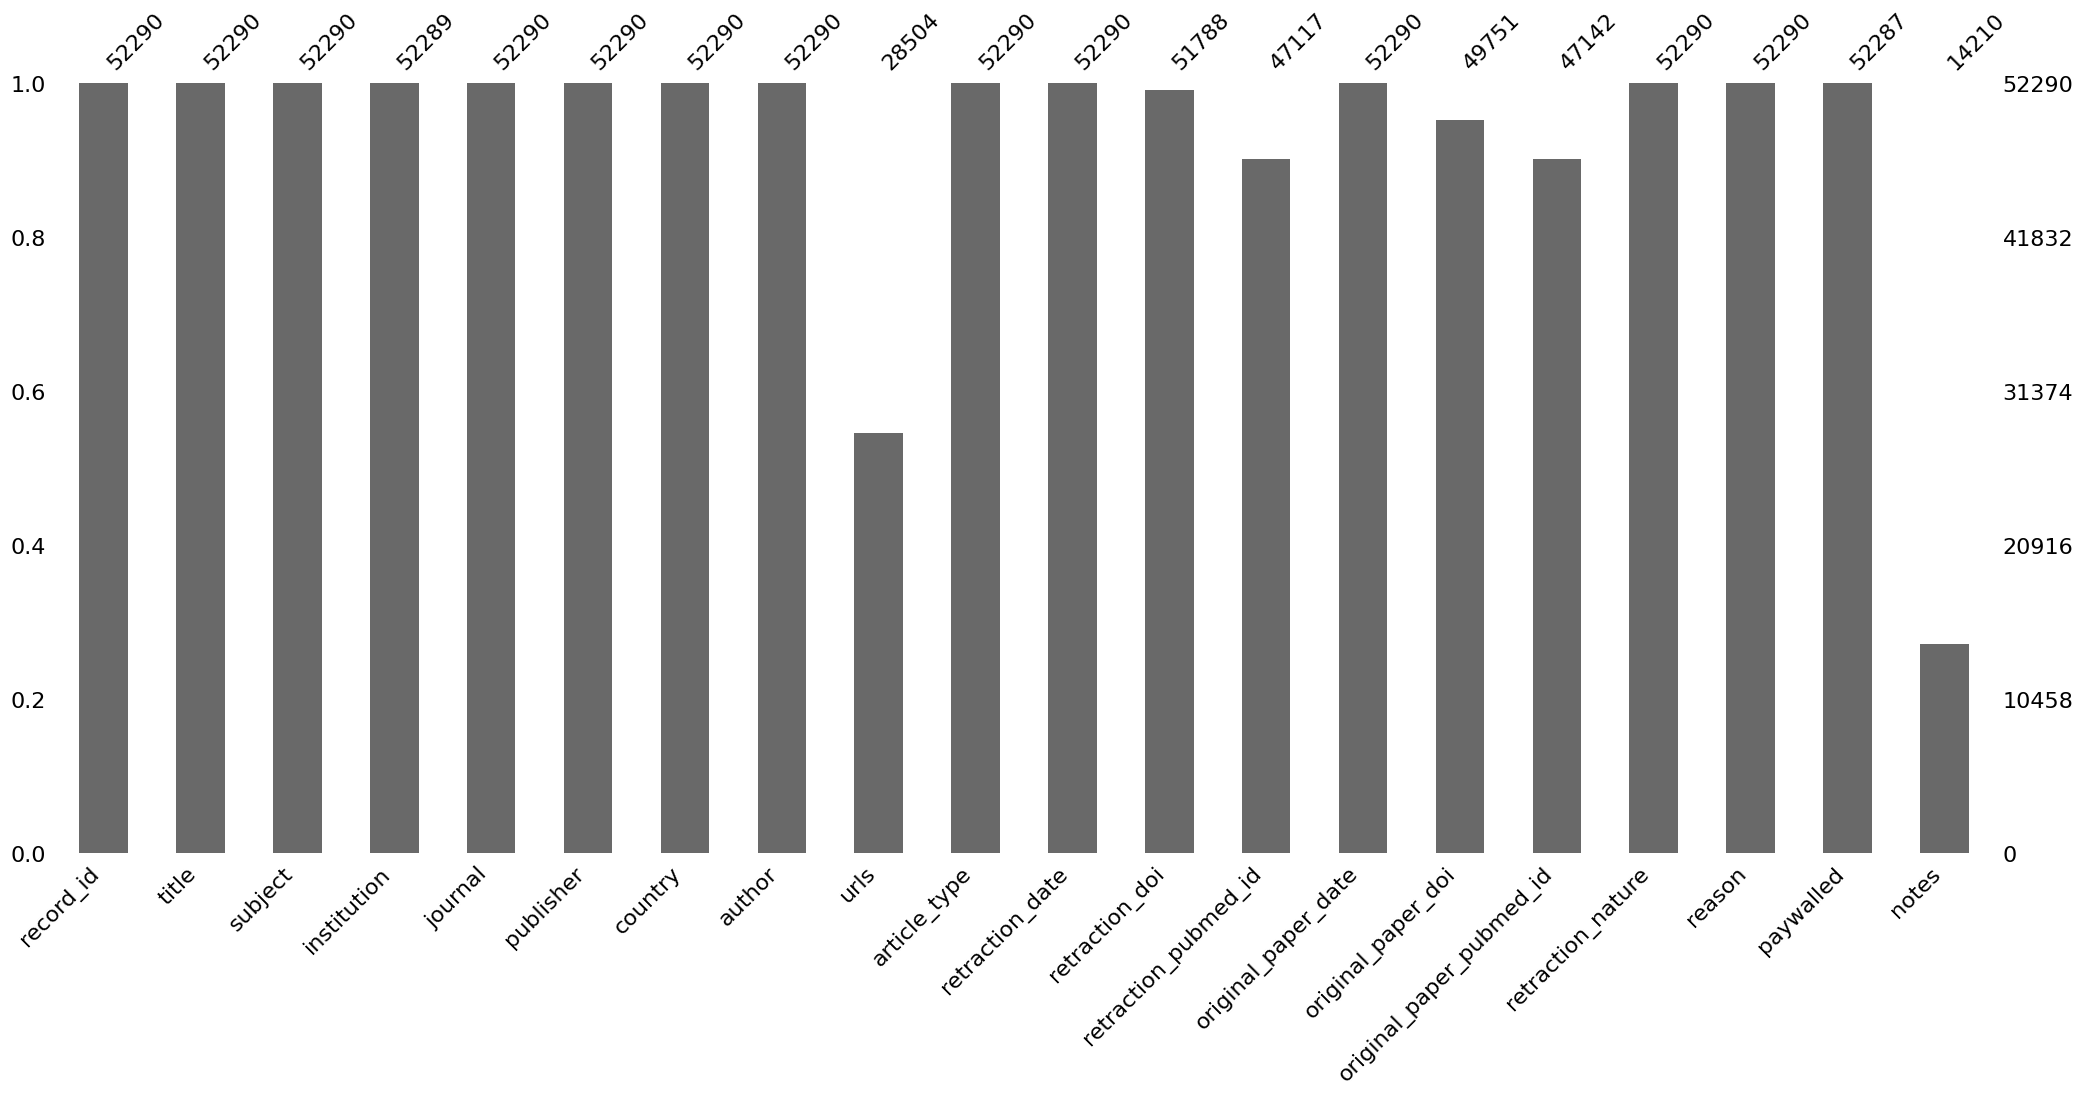

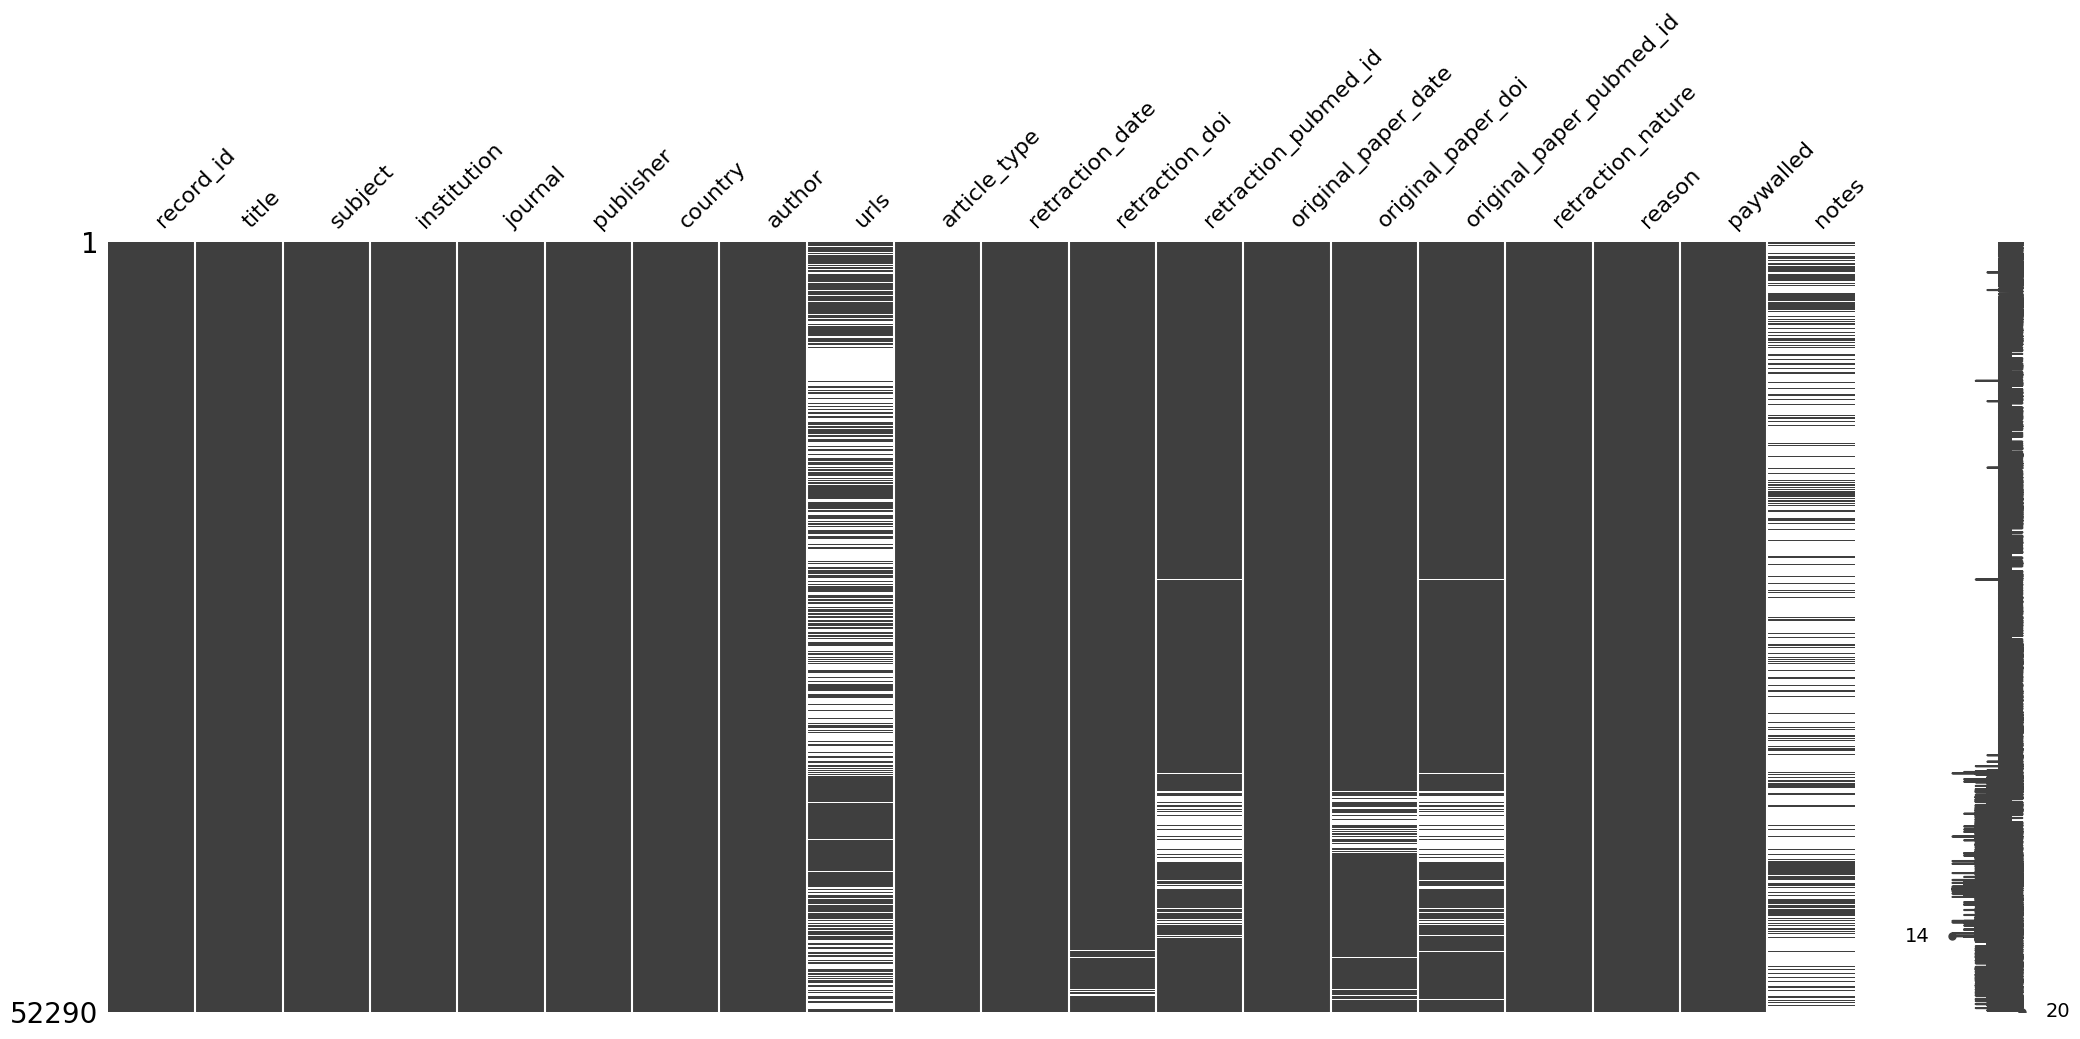

In [45]:

# Visualize NaNs per column using bars

msno.bar(df)

# Visualize NaNs per column using matrix

msno.matrix(df)


There are indeed quite a few columns with non-null entries. Luckily several of them are relatively inessential to our task, as they contain either "notes" or URLs and identifiers that will not be immediately useful to us. The columns that will the most important for our purposes, in fact, will be the following:

- Original Paper DOI
- Retraction Nature
- Paywalled
- Article Type
- Original Paper Date
- Reason for Retraction
- Subject

In the next section, we will take a look at each one of these columns, except for the last two. Because these two last columns require more elaborate treatment, we will postpone dealing with them until the next two notebooks. 

As for the rest of the colums, we will avoid dropping for now even if the information that they contain is not immediatelly useful for our purposes. Still, it might be useful to have this information available for reference in the future, so we will keep them for now.


## The "Original Paper DOI Column"


As saw above, the "original paper DOI column" is the only column with relevant information that contains NaNs. Let us find out exactly how many of them we have, see if it might be safe to simply drop them:


In [46]:

# Obtain total number of papers with no doi

df.original_paper_doi.isnull().sum()


2539


It would be good to know what percentage of the total number of papers in our data set this represents. Since we will be trying to compute these kinds of percentages again for other columns, it will be useful to define a function that we can re-use later (we will also be adding all function definitions to a python file in our root folder, so that we can use them in other notebooks as well):

In [47]:

# Define percentage_finder function

def percentage_finder(df, col_name, val_name):
    """This function takes a data frame, the name of a column, and one of the 
    possible values of the column. It then returns how often that one value 
    occurs in that column of the data frame."""
    
    if pd.isna(val_name):  # In case we want to check how many entries are NanNs
        count = df[col_name].isna().sum()
    else:
        count = df[df[col_name] == val_name][col_name].count()
        
    percentage = (count / len(df[col_name])) * 100
            
    return percentage

We can now use this function to find out what percentage of rows in our column are null:

In [48]:

# Call percentage_finder function to find out % of paper with NaN values in "original_paper_doi" column

print(round(percentage_finder(df, "original_paper_doi", np.nan),2), "%")
   

4.86 %


This is a relatively small percentage of our papers. Since the DOI is the one identifier that we will use to access text data for our papers, so it is essential that we have one. We will thus drop all papers without a DOI from our data set (since it might be useful to keep a record of our original data frame for future comparison, we will create a new data frame to store our "clean" information):

In [49]:

# Create new clean data frame to store clean information only

df_clean = df.copy()

# Drop values with NaN entries from "original_paper_doi" column

df_clean = df_clean.dropna(subset=["original_paper_doi"])

# Check that it worked

df_clean.original_paper_doi.isnull().sum()


0

Note that it is still possible that some of the entries in the "original_paper_doi" column, while not being NaNs, will contain no valid DOI. Since all valid DOIs start with the character sequence "10." we can easily find out whether we have any such cases. We will store all papers with an invalid DOI in a new data frame as that will be useful to manipulate later:

In [50]:

# Convert column entries to string string type and strip whitespaces

df_clean['original_paper_doi'] = df_clean['original_paper_doi'].astype(str).str.strip()

# Create new data frame with invalid DOIs that do NOT start with "10." only

df_invalid_dois = df_clean[~df_clean['original_paper_doi'].str.startswith('10.')]

# Visualize resulting data frame with invalid DOIs

df_invalid_dois.head(1)


,record_id,title,subject,institution,journal,publisher,country,author,urls,article_type,retraction_date,retraction_doi,retraction_pubmed_id,original_paper_date,original_paper_doi,original_paper_pubmed_id,retraction_nature,reason,paywalled,notes
207,52496,Comparison between two laparoscopic retropubic...,(HSC) Medicine - Surgery;(HSC) Medicine - Urol...,"Obstetrics and Gynecology, University Magna Gr...",Minerva Surgery (formerly Minerva Chirurgica),Edizioni Minerva Medica,Italy,Stefano Palomba;Tiziana Russo;Domenico Iuzzoli...,NaN,Clinical Study;,2/1/2024 0:00,10.23736/S2724-5691.23.10214-0,38381033.0,6/1/2002 0:00,unavailable,12029227.0,Retraction,+Duplication of Article;+Euphemisms for Duplic...,No,NaN


As we can see, we do have entries for which the "original_paper_doi" simply says "unavailable." It would be good to find out how many different kinds of invalid DOIs we have, and how often each one of them occurs. In order to do that, we can create and display a new pandas series with the value count of each unique kind of invalid DOI on our data frame, as that will turn out to be convenient later:

In [51]:

# Create new data frame with number of occurrances of each kind of invalid DOI as column entries 

invalid_doi_count = df_invalid_dois['original_paper_doi'].value_counts()

# Visualize elements and values of new data frame to find out frequency of each kind of invalid DOI

invalid_doi_count


original_paper_doi
Unavailable                    2236
unavailable                    1139
doi: 10.1074/jbc.M313385200       1
doi:10.1038/srep25491             1
Name: count, dtype: int64

We can see that there are only four kinds of unique non-valid DOIs. It would be good to find out how many of the papers in our data set have those kinds of invalid DOIs. Let us our percentage finder function to find out whate percentage over the total number of papers in our data set those numbes represent:

In [52]:

# Message clarifying meaning of numbers to be displayed

print("Percentage of papers with each kind of invalid DOI:\n")

# Visualize elements and values of invalid_doi_count series 

for element, value in invalid_doi_count.items():
    print(f"{element}: {round(percentage_finder(df_clean,'original_paper_doi', element),3)}%")

 

Percentage of papers with each kind of invalid DOI:

Unavailable: 4.494%
unavailable: 2.289%
doi: 10.1074/jbc.M313385200: 0.002%
doi:10.1038/srep25491: 0.002%


As we can see, these percentages are once again relatively small. We will therefore proceed to drop the rows for papers without a valid DOI from our data frame:

In [53]:

# Keep only those rows whose value for the "original_doi_column" starts with "10."

df_clean = df_clean[df_clean['original_paper_doi'].str.startswith('10.')]

# Make sure size of clean data frame is correct

print(df_clean.shape)

# Visualize new clean data set to make sure all is as desired

df_clean.head(1)


(46374, 20)


,record_id,title,subject,institution,journal,publisher,country,author,urls,article_type,retraction_date,retraction_doi,retraction_pubmed_id,original_paper_date,original_paper_doi,original_paper_pubmed_id,retraction_nature,reason,paywalled,notes
0,52765,An integrated 3D model based face recognition ...,(B/T) Data Science;(B/T) Technology;,"Management Information System Department, Cypr...",Applied Nanoscience,Springer,Turkey,Ali Milad;Kamil Yurtkan,https://retractionwatch.com/2024/01/26/springe...,Research Article;,6/30/2023 0:00,10.1007/s13204-024-03010-9,0.0,2/3/2022 0:00,10.1007/s13204-021-02123-9,0.0,Correction,+Error in Text;+Updated to Retraction;,No,See also: https://pubpeer.com/publications/BCC...



As one can see, we did get rid of a substantial amount of the papers in our original data frame. The papers that remain, however, are exactly the ones that we need for our investigation, and the pay-off that results from this in will be substantial in later notebooks.

Before we continue, we will convert all remaining entries of the column to string type, since we will be using DOIs as strings in future notebooks:

In [54]:

df['original_paper_doi'] = df['original_paper_doi'].astype(str).fillna('')


## The "Retraction Nature" Column

Having dealt with the NaN entries in the "original_paper_doi" column, we can now turn to the rest of the columnns that we wanted to analyze, none of which had null entries. Let us start by taking a look at the "Retraction Nature" column. We will first display the unique values of the column:

In [55]:
# Visualize unique values of the column

df_clean.retraction_nature.unique()


array(['Correction', 'Retraction', 'Expression of concern',
       'Reinstatement'], dtype=object)

We are interested in finding out how often each one of those reasons for retractions occur in our data set. We already created a function to calculate the frequency with which a give value occurs in a column, but it will be useful to further automate the process of systematically calculating and displaying these percentages for all the values in a given column, since we will be doing that for other columns in this notebook. Let us thus go ahead and define a function that does just that (note also that this function would not have helped us with the percentages that we calculated earlier in our analysis of the "original_paper_doi" column. There, unlike here, we wanted to calculate the f):

In [56]:

# Define percentage_printer function

def percentage_printer(df, col_name):
    """This function takes a data frame and a column name as input. It then calls
    the percentage_finder function to print the percentage of occurrances of each
    value of the column."""
        
    val_list = []
    val_list = df[col_name].unique()
        
    for value in val_list:
        percentage = percentage_finder(df, col_name, value)
        print(f"{value}: {round(percentage,2)}%")
        

It will also be useful to create a function that draws a histogram displaying the occurrances of all the values in a given data frame, so as to have a visual representation of what those percentages amount to:

In [57]:

# Define histogram printer function

def histogram_printer(df, col_name):
    """Takes a data frame and a column name as input, produces a histogram
    for the vaulues of that column of the data frame"""
    
    df[col_name].hist()


We can now use those functions to obtain the relative frequence with which each reson for retraction occurs. First we call the percentage printer function to visualize those relative frequencies, expressed as percentages:

In [58]:

# Call percentage_printer to obtain frequencies of each reason for retraction

percentage_printer(df_clean, "retraction_nature")


Correction: 2.61%
Retraction: 90.53%
Expression of concern: 6.58%
Reinstatement: 0.29%


And next we call our histogram printer function to visualize those frequencies in a histogram:

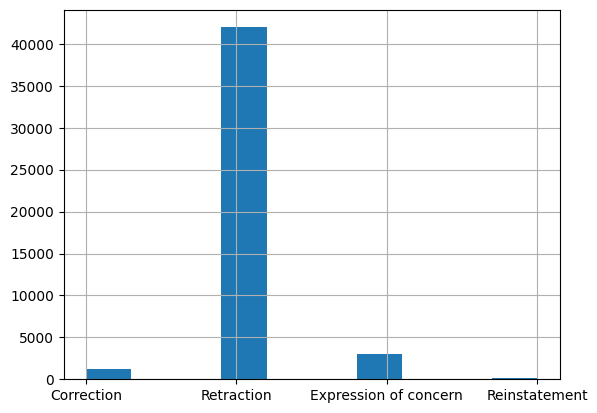

In [59]:

# Call histogram_printer to produce histogram for "Retraction Nature" column

histogram_printer(df_clean, "retraction_nature")



As we can see, the vast majority of papers papers were actually retracted. Since this is what we are primarily interested in, we can drop the articles that belong to the remaining three categories:

In [60]:

# Retain only entries with "Retraction" value in the "Retraction Nature" column

df_clean = df_clean[df_clean["retraction_nature"] == "Retraction"]

# Drop "Retraction Nature" column

df_clean.drop("retraction_nature", axis=1, inplace = True)

# Check that it worked

df_clean.columns


Index(['record_id', 'title', 'subject', 'institution', 'journal', 'publisher',
       'country', 'author', 'urls', 'article_type', 'retraction_date',
       'retraction_doi', 'retraction_pubmed_id', 'original_paper_date',
       'original_paper_doi', 'original_paper_pubmed_id', 'reason', 'paywalled',
       'notes'],
      dtype='object')

## The "Paywalled" Column

Next we turn to the "Paywalled Column." Let us once again find out what the unique values of this column are:

In [61]:

# Visualize the unique values of the Paywalled column

df_clean.paywalled.unique()


array(['No', nan, 'Unknown', 'Yes'], dtype=object)

And again, let us continue by using the percentage printer function that we defined above to find out how often each one of those values occurs:

In [62]:

# Call percentage_printer function to visualize relative frequency of each reason

percentage_printer(df_clean, "paywalled")


No: 96.35%
nan: 0.01%
Unknown: 0.27%
Yes: 3.37%


And by visualizing those percentages by using our histogram_printer function:

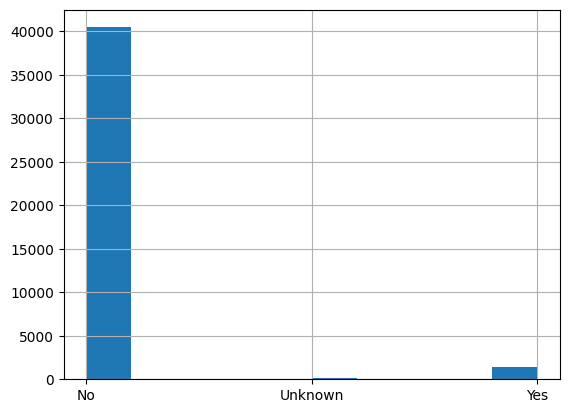

In [63]:

# Visualize histogram for Paywalled column

histogram_printer(df_clean, "paywalled")



We see that the majority of the papers in our data set are not paywalled, which is good. Still, we will see how useful information (such as full text n-grams) is sometimes available for paywalled papers, so we will leave those papers in. It might also be useful to know if a given paper is paywalled or not, so we will leave the column in our data frame after all. 

## The "Article Type" Column


Let us now take a look at the "Article Type" column. As always, we start by checking the number of unique values in this column:

In [64]:

# Display number of unique values in "Article Type" column

df_clean.article_type.nunique()


87


We have a lot of different values in the column, so let's try and see how often each one of those occurs by using our percentage_printer function:

In [65]:

# Find percentages of articles with each article type

percentage_printer(df_clean, "article_type")


Research Article;: 61.71%
Review Article;: 3.26%
Preprint;Research Article;: 0.15%
Correction/Erratum/Corrigendum;: 0.06%
Case Report;: 1.07%
Clinical Study;: 4.12%
Case Report;Review Article;: 0.03%
Clinical Study;Research Article;: 0.34%
Clinical Study;Preprint;: 0.01%
Meta-Analysis;: 0.76%
Research Article;Review Article;: 0.05%
Article in Press;Research Article;: 0.8%
Meta-Analysis;Research Article;: 0.02%
Conference Abstract/Paper;: 23.44%
Commentary/Editorial;: 0.37%
Commentary/Editorial;Letter;: 0.04%
Case Report;Letter;: 0.24%
Article in Press;Review Article;: 0.07%
Article in Press;Meta-Analysis;: 0.01%
Book Chapter/Reference Work;: 1.11%
Letter;Research Article;: 0.15%
Guideline;Research Article;: 0.03%
Retraction Notice;: 0.02%
Meta-Analysis;Review Article;: 0.08%
Article in Press;Case Report;Review Article;: 0.01%
Case Report;Research Article;: 0.02%
Meta-Analysis;Research Article;Review Article;: 0.0%
Conference Abstract/Paper;Review Article;: 0.04%
Case Report;Conference 


We see that most article types are not actually represented in the data set, and that the article types that we are interested in comprise the vast majority of the papers. So will keep information for "Research Articles," "Review Articles," and "Conference Abstract/Papers:"

In [66]:

# Drop articles types that are of no interest
# Note the semicolon at the end to match the format of the entries in the "Article Type" column

df_clean = df_clean[df_clean["article_type"].isin(["Research Article;", "Review Article;", "Conference Abstract/Paper;"])]

# Check that it worked

df_clean.article_type.unique()


array(['Research Article;', 'Review Article;',
       'Conference Abstract/Paper;'], dtype=object)

## The "Original Paper Date" Column

Finally, let us take a look at the "original_paper_date" column. As it is easy to see, this colum contains the specific publication date for each article in our data set. However, the year of publication of each paper will often be more than enough for our purposes. It will therefore be useful to add a column to our data frame that contains this information only:

In [67]:

# Convert column entries of clean data frame to datetime format
# Note that item at position 5045 has diverging format

df_clean['original_paper_date'] = pd.to_datetime(df_clean['original_paper_date'], format='mixed')

# Extract year iformation and create new column with it 

df_clean['year'] = df_clean['original_paper_date'].dt.year

# Visualize result

df_clean.head(1)


,record_id,title,subject,institution,journal,publisher,country,author,urls,article_type,retraction_date,retraction_doi,retraction_pubmed_id,original_paper_date,original_paper_doi,original_paper_pubmed_id,reason,paywalled,notes,year
1,52762,Convolutional neural network and Kalman filter...,(B/T) Data Science;(B/T) Technology;(PHY) Engi...,"Engineering Campus, School of Electrical and E...",Applied Nanoscience,Springer,Malaysia,Bushra N Alsunbuli;Widad Ismail;Nor M Mahyuddin,https://retractionwatch.com/2024/01/26/springe...,Research Article;,1/11/2024 0:00,10.1007/s13204-024-03006-5,0.0,2021-09-17,10.1007/s13204-021-02043-8,0.0,+Concerns/Issues about Referencing/Attribution...,No,See also: https://pubpeer.com/publications/83D...,2021



Before we are done with this notebook and write our clean data into a .csv file, let us quickly find out how many retracted papers do we have in our data set after data cleaning, and what percentage of the entries in our original data set those represent:

In [68]:

# Print message with number of papers after data cleaning

print(f"Number of papers in clean data frame: {df_clean.shape[0]}.")

# Print message with percentage of dropped papers 

print(f"Percentage of papers of original data frame that remain in clean data frame: {round(df_clean.shape[0] / df.shape[0] * 100,2)}%.")


Number of papers in clean data frame: 37117.
Percentage of papers of original data frame that remain in clean data frame: 70.98%.


## Output

Having finished out data cleaning operation, we can write the content of our new, clean data frame into a .csv file:

In [69]:

# Save date frame as .csv

df.to_csv(output_path, index=False)
